# Klasyfikacja i regresja przy pomocy metod SVM

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import itertools
from sklearn import svm, datasets, metrics, model_selection
from matplotlib import style
style.use("ggplot")

Biblioteka ułatwiająca rysowanie granic decyzyjnych ( *pip install mlxtend* ):

In [17]:
from mlxtend.plotting import plot_decision_regions

In [18]:
def plot_hyperplane(X, y, clf):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0, 10)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    plt.axis('tight')
    plt.show()

### Prosty przykład klasyfikacji 

In [19]:
X = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11],[2,3]])
y = np.array([0,1,0,1,0,1,1])

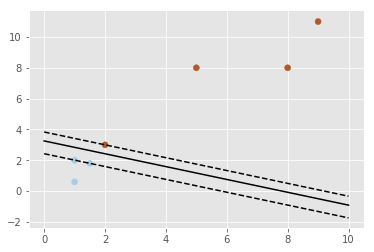

In [20]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X,y)

plot_hyperplane(X, y, clf)
#plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

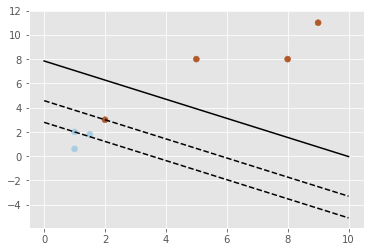

In [21]:
clf = svm.SVC(kernel='linear', C=0.01)
clf.fit(X,y)

plot_hyperplane(X, y, clf)

#plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

### Przykład zbioru nieseparowalnego liniowo

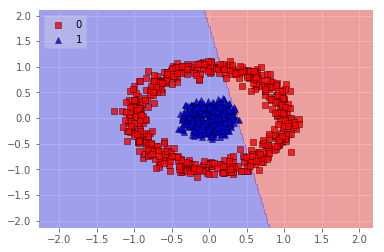

In [7]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

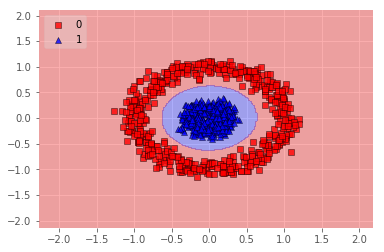

In [8]:
clf = svm.SVC(kernel='rbf', C=1.0)
clf.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

### Porównanie różnych typów kerneli
TODO: Poeksperymentować z różnymi wartościami C, gamma i degree.

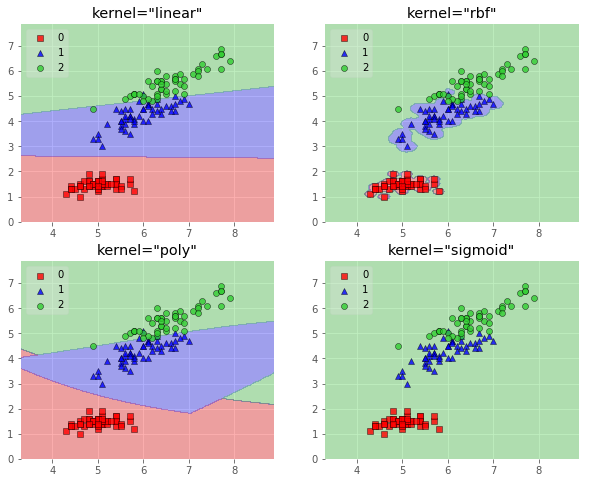

In [22]:
# Initializing Classifiers
C = 1.0
gamma = 100
degree = 3
coef0 = 100

clf1 = svm.SVC(kernel='linear', C=C)
clf2 = svm.SVC(kernel='rbf', gamma=gamma, C=C)
clf3 = svm.SVC(kernel='poly', degree=degree, C=C)
clf4 = svm.SVC(kernel='sigmoid', coef0=coef0, C=C)

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target


gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['kernel="linear"', 'kernel="rbf"', 'kernel="poly"', 'kernel="sigmoid"']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

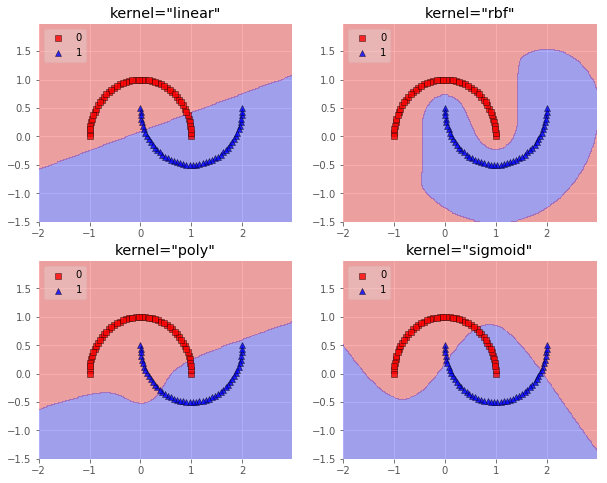

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

C = 1.0
gamma = 10
degree = 3

clf1 = svm.SVC(kernel='linear', C=C)
clf2 = svm.SVC(kernel='rbf', gamma=gamma, C=C)
clf3 = svm.SVC(kernel='poly', degree=degree, C=C)
clf4 = svm.SVC(kernel='sigmoid', C=C)

labels = ['kernel="linear"', 'kernel="rbf"', 'kernel="poly"', 'kernel="sigmoid"']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Klasyfikacja danych z przykładowego zbioru

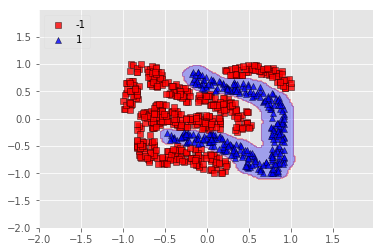

In [10]:
from sklearn.model_selection import cross_val_score

df = pd.read_csv('data/dataset2.csv')

X = df[['f1','f2']].as_matrix()
y = df['l'].as_matrix()

clf = svm.SVC(kernel='rbf', gamma=99.7, C=1.0)
clf.fit(X, y)

plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.show()

### Multiclass SVM

In [11]:
X = [[0], [1], [2], [3]]
y = [0, 1, 2, 3]

# one vs. one
clf = svm.SVC(kernel='linear', decision_function_shape='ovo')
clf.fit(X, y)
dec_ovo = clf.decision_function([[1]])
dec_ovo.shape[1] #6 klasyfikatorów w funkcji decyzyjnej (wszystkie kombinacje 4 klas)
print(dec_ovo.shape[1])

# one vs. rest 
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
clf.fit(X, y)
dec_ovr = clf.decision_function([[1]])
dec_ovr.shape[1] #4 klasyfikatory (tyle, ile klas)
print(dec_ovr.shape[1])

6
4


### Regresja

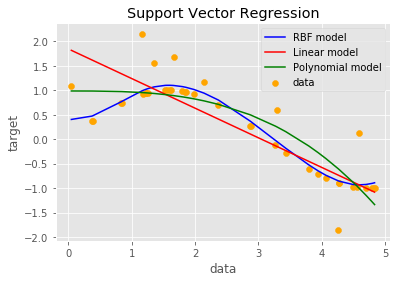

In [12]:
# Generate sample data with noise
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

svr_rbf = svm.SVR(kernel='rbf')
svr_lin = svm.SVR(kernel='linear')
svr_poly = svm.SVR(kernel='poly')
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

plt.scatter(X, y, color='orange', label='data')
plt.plot(X, y_rbf, color='blue', label='RBF model')
plt.plot(X, y_lin, color='red', label='Linear model')
plt.plot(X, y_poly, color='green', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Krzywa ROC

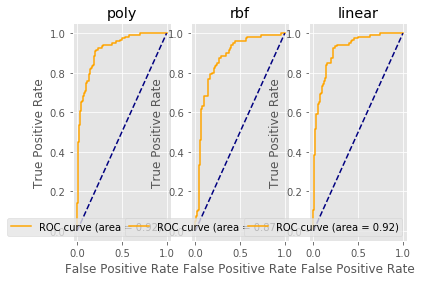

In [13]:
# generate set and choose a training sample
X, y = datasets.make_blobs(n_samples=500, centers=2, cluster_std=4.0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.5)

gs = gridspec.GridSpec(1, 3)
svm = svm.SVC()
i = 0

# generate ROC curve for different kernel methods
for kernel in ['poly', 'rbf', 'linear']:
    ax_roc = plt.subplot(gs[0, i])
    svm.kernel = kernel
    scores = svm.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, thr = metrics.roc_curve(y_test, scores)
    roc_auc = metrics.auc(fpr, tpr)

    fig = plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.title(kernel)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    i += 1

plt.show()